# Step: 1 Load the Dataset
## Dataset Link:

https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset

In [1]:
import pandas as pd
df =  pd.read_csv('./data/loan.csv')

In [2]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


# Step 2: Perform a simple EDA - 10 points

### Remember to check for class imabalance in target or null values

In [3]:
df['loan_status'].value_counts()

loan_status
Approved    45
Denied      16
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

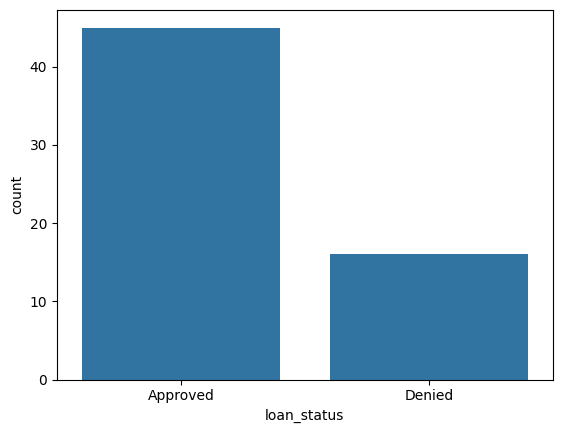

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df['loan_status'].value_counts())

In [12]:
df.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

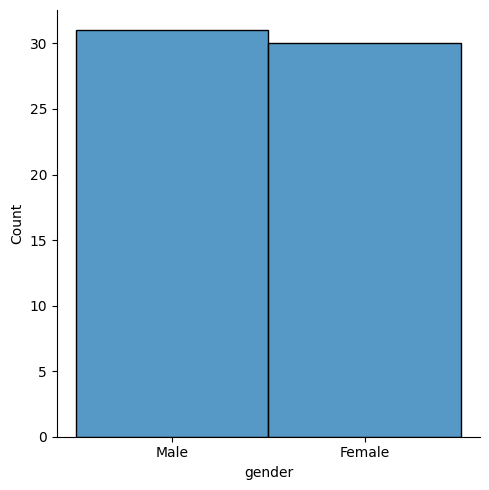

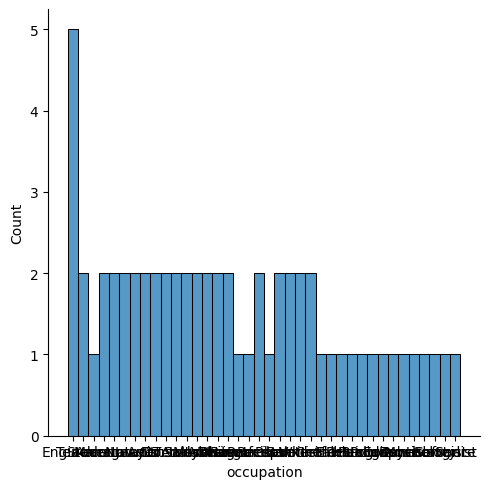

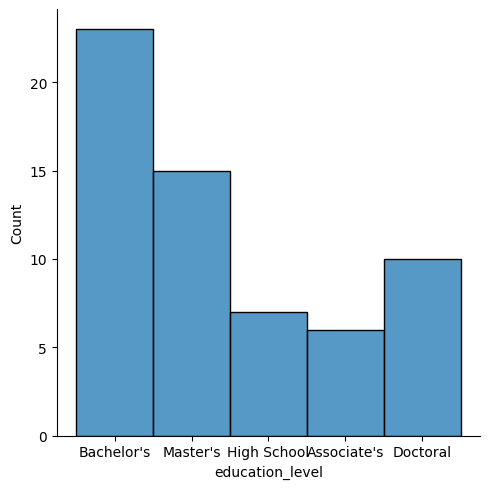

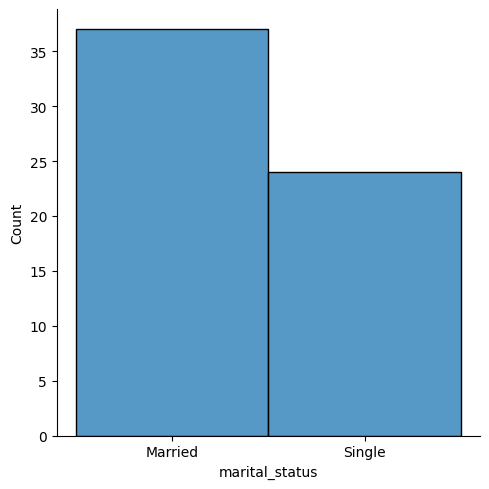

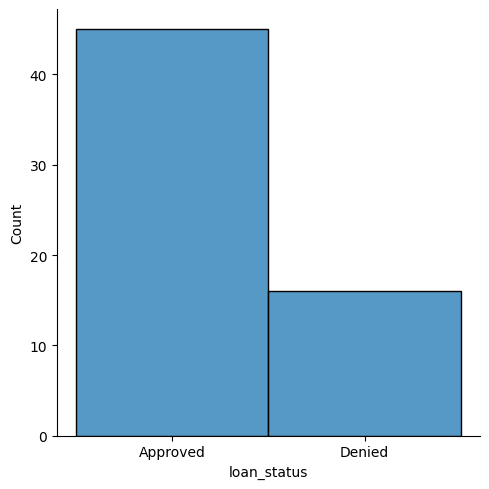

In [18]:
col_cat = ['gender', 'occupation', 'education_level', 'marital_status']
for i in col_cat:
    sns.displot(data=df[i])

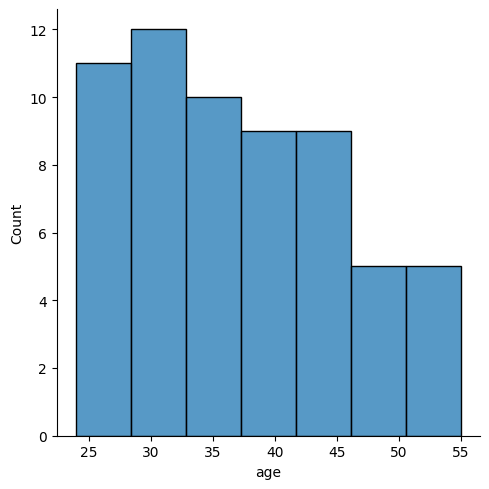

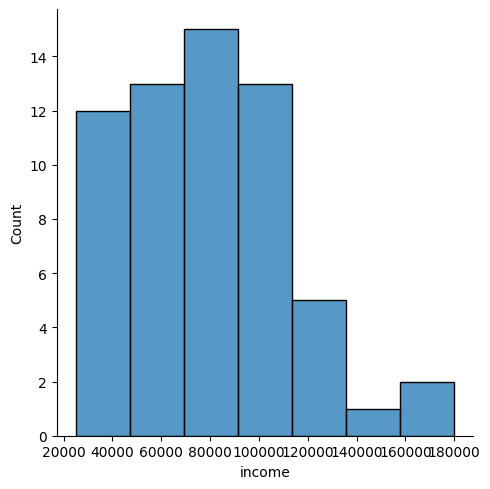

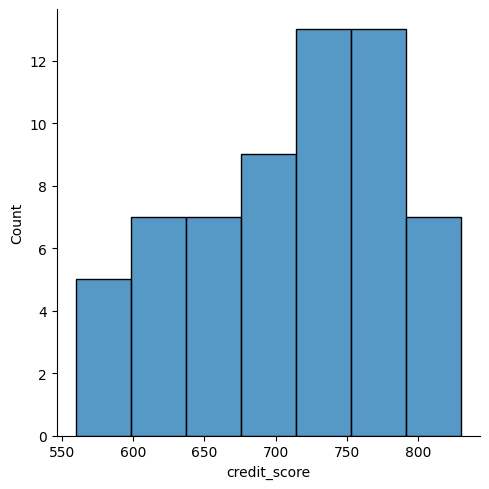

In [19]:
col_num = ['age','income', 'credit_score']

for i in col_num:
       sns.displot(data=df[i])

In [5]:
from sklearn.preprocessing import LabelEncoder

df.columns

cat_col = ['gender', 'occupation', 'education_level', 'marital_status', 'loan_status']

le_dict = {}

for i in cat_col:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])
    le_dict[i] = le

In [6]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0


<Axes: >

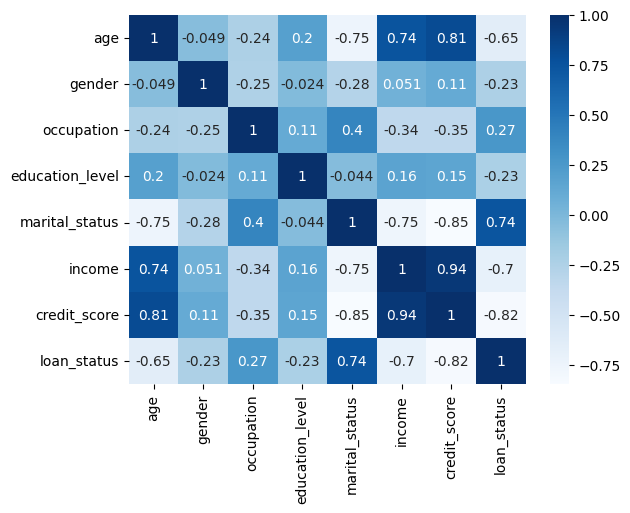

In [7]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [8]:
# select the features with 0.6 correlation score.
X = df[['age', 'marital_status',
       'income', 'credit_score']]

y = df['marital_status']

## Step 3: Here as the classes are imabalanced we go for wither upsampling, downsampling or SMOTE - 20 points

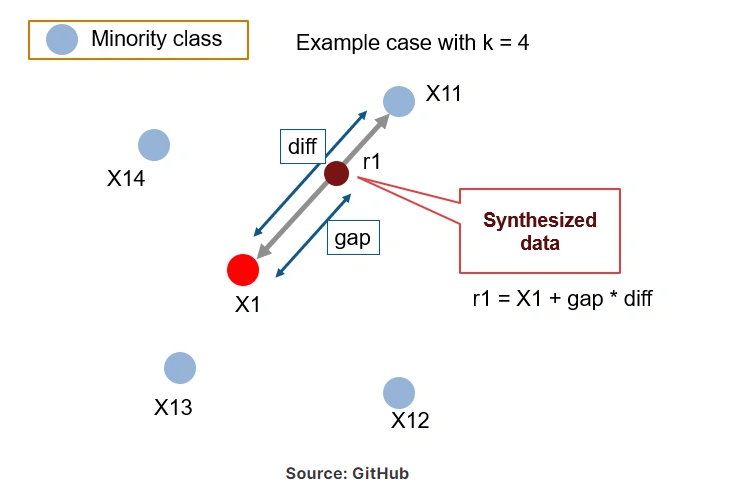

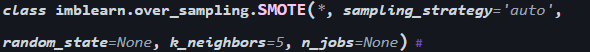

In [9]:
from imblearn.over_sampling import SMOTE

somte = SMOTE(random_state=41)
X_upsample, y_upsample = somte.fit_resample(X=X,y=y)

# Step 4: Split into test and train - 5 points

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_upsample,y_upsample,train_size=0.8)

# Step 5: Perform Scaling and Label Encoding - 5 points

In [11]:
# all three numerical columns are not in bounded range and the distribution is fairly normal. So, decided to use StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['age','income', 'credit_score']] = scaler.fit_transform(X_train[['age','income', 'credit_score']])

X_test[['age','income', 'credit_score']] = scaler.transform(X_test[['age','income', 'credit_score']])

# Step 6: Grid Search (Remember to use the correct Technique) - 5 points

In [12]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

kfold = KFold(n_splits=5)

algorithms = [LogisticRegression(),KNeighborsClassifier(),GradientBoostingClassifier(n_estimators=10),SVC()]

algorithm_names =  ['linear_regression', 'KNeighborsClassifier' , 'GradientBoostingClassifier', 'SVC']


for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')
    print(f"{algorithm_names[i]} - Score:{scores} - Mean Score {scores.mean()}")

linear_regression - Score:[1.         1.         1.         0.83333333 1.        ] - Mean Score 0.9666666666666668
KNeighborsClassifier - Score:[1.         1.         1.         0.83333333 1.        ] - Mean Score 0.9666666666666668
GradientBoostingClassifier - Score:[1. 1. 1. 1. 1.] - Mean Score 1.0
SVC - Score:[1.         1.         1.         0.83333333 1.        ] - Mean Score 0.9666666666666668


In [13]:
param_grid = {
    'max_depth':[5,10,15],
    'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
}

xgboost = GradientBoostingClassifier()

grid = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=kfold, scoring='recall')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             scoring='recall')

In [14]:
grid.best_score_

1.0

In [15]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 5}

# Step 7: Perform Evaluation - 10 points

---



In [16]:
from sklearn.metrics import classification_report

yhat = grid.predict(X_test)

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# Analyse - 5 points

- The accuracy, precision and recall are not much different for each algorithm. However, gradient boosting is slighlty better in recall.
- The gradient boosting predicts all test data correctly as the dataset is  very small. The other algorithms also predict most of the data correctly but there are some errors.
- The best parameters is {'max_depth': 5, 'n_estimators': 5}.

## What is SMOTE (Synthetic Minority Oversampling Technique)



*   SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
*   This algorithm helps to overcome the overfitting problem posed by random oversampling.
*   It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:

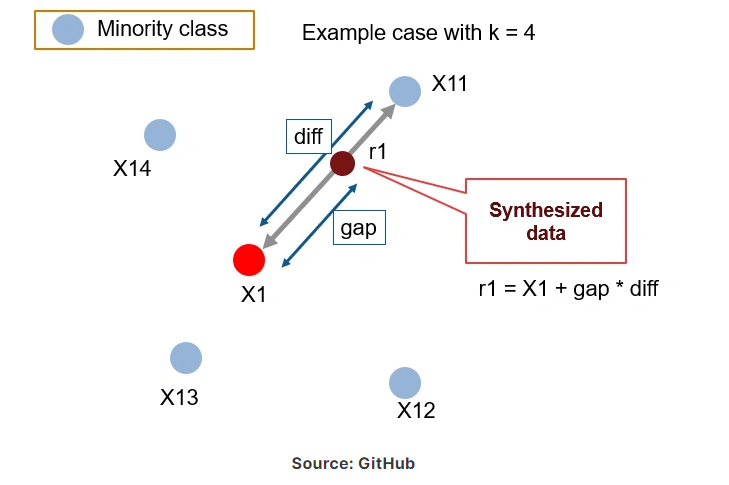

Though this algorithm is quite useful, it has few drawbacks associated with it.

* The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.
* SMOTE tends to create a large no. of noisy data points in feature space.


### ADASYN: Adaptive Synthetic Sampling Approach

* Generalized form of the SMOTE algorithm
* This algorithm also aims to oversample the minority class by generating synthetic instances for it.
* But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn.
* Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.



### Hybridization: SMOTE + Tomek Links

* Hybridization techniques involve combining both undersampling and oversampling techniques.

* This is done to optimize the performance of classifier models for the samples created as part of these techniques.

* SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links.

### Hybridization: SMOTE + ENN
* SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

* Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.


##### Extra Reading
* Learning from Imbalanced Data Sets by Alberto Fernández, Salvador García, Mikel Galar, Ronaldo C. Prati, Bartosz Krawczyk, Francisco Herrera

# Homework (Perform oversampling and undersampling and analyze the differences between SMOTE/ Oversampling and Undersampling) - 30+20 points


SMOTE Upsampling

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
# upsample
somte = SMOTE(random_state=41)
X_train_upsample, y_train_upsample = somte.fit_resample(X=X_train,y=y_train)
# check train sizes
print(X_train_upsample.shape)
# train
GradBoost = GradientBoostingClassifier(max_depth=5,n_estimators=5)
GradBoost.fit(X_train_upsample,y_train_upsample)
# test
yhat = GradBoost.predict(X_test)
# analyse
print(classification_report(y_test,yhat))


(56, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



ENN Downsampling

In [28]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
# downsample
enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X=X_train,y=y_train)
# check train sizes
print(X_train_enn.shape)
# train
GradBoost = GradientBoostingClassifier(max_depth=5,n_estimators=5)
GradBoost.fit(X_train_enn,y_train_enn)
# test
yhat = GradBoost.predict(X_test)
# analyse
print(classification_report(y_test,yhat))


(43, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



Tomek Lins downsampling

In [30]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
# downsample
TML = TomekLinks()
X_train_TML, y_train_TML = TML.fit_resample(X=X_train,y=y_train)
# check train sizes
print(X_train_TML.shape)
# train
GradBoost = GradientBoostingClassifier(max_depth=5,n_estimators=5)
GradBoost.fit(X_train_TML,y_train_TML)
# test
yhat = GradBoost.predict(X_test)
# analyse
print(classification_report(y_test,yhat))


(46, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



Analysing the classes

In [25]:
# original y
y_train.value_counts()

marital_status
0    31
1    17
Name: count, dtype: int64

In [23]:
# y after SMOTE
y_train_upsample.value_counts()

marital_status
1    28
0    28
Name: count, dtype: int64

In [31]:
# y after ENN
y_train_enn.value_counts()

marital_status
1    22
0    21
Name: count, dtype: int64

In [32]:
# y affer Tomek links
y_train_TML.value_counts()

marital_status
0    24
1    22
Name: count, dtype: int64

It can be seen that the model performances are excalty the same for different sampling techniques. This is due to the small and simple dataset. For undersmapling methods like ENN and Tomek links, the sizes of the classses are not exactly the same but they are nearly the same. On the other hand, SMOTE make the classes the same size. Downsampling removes the dominant classes more than in upsampling while both increase the lesser classes to address the classe imbalances.